# Extraordinario Líneas de Espera

A un autolavado los autos llegan siguiendo una distribución de Poisson, con 4 autos por hora, que pueden esperar en el estacionamiento de la instalación, si el lugar del lavado está ocupado. El tiempo para lavar y limpiar un automóvil es exponencial, con 10 minutos de promedio. Los automóviles que no se pueden estacionar en la instalación pueden esperar junto al lavado. Eso quiere decir que para todo fin práctico no hay límite del tamaño del sistema. ¿Qué capacidad debe tener el estacionamiento?

     0.000 1
                  0.802 0
     9.492 1
    11.710 2
                 16.162 1
                 16.345 0
    45.551 1
                 54.994 0
    57.828 1
                 65.625 0
    74.067 1
    93.790 2
                 94.320 1
    94.776 2
                 95.168 1


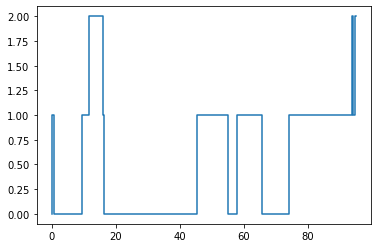

In [5]:
from random import random 
from math import log
import matplotlib.pyplot as plt
T=100    #tiempo de simulación
l_l=4/60   #parametro lambda, llega un usario por minuto (en minutos) 4 horas
l_s=0.1 #clientes por minuto que puede atender el servidor 10 minutos
t=0     #tiempo de reloj inicial
infi=100000000
ts=infi #tiempo de ocurrencia de la proxima salida
tl=0    #tiempo de ocurrencia de la proxima llegada
l=0
lx=[]
ly=[]
while min(tl,ts)<T:
    ta=t
    t=min(tl,ts)
    lx.append(ta)
    ly.append(l)
    lx.append(t)
    ly.append(l)
    if t==tl: #es una llegada
        l=l+1
        print("%10.3f"%tl,l)
        tl=t-(1/l_l)*log(random())
        if l==1:
            ts=t-(1/l_s)*log(random()) #generando una exponencial (metodo de la inversa)
    else:     #es una salida
        l=l-1
        print("            ","%10.3f"%ts,l)
        if l==0:
            ts=infi
        else:
            ts=t-(1./l_s)*log(random())
plt.plot(lx,ly)
plt.show()
#Los eventos a la izquierda son llegadas y a la derecha son salidas

Ahora definimos una función para hacer mas simulaciones 


Media del tiempo en el que el servidor esta desocupado  32.93686096117524


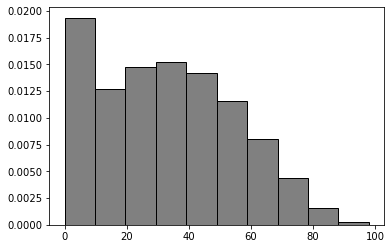

In [2]:
from random import random 
from math import log
import matplotlib.pyplot as plt
def f():
  T=100 
  l_l=4/60 
  l_s=0.1
  t=0 
  infi=100000000
  ts=infi 
  tl=0    
  l=0
  suma=0
  while min(tl,ts)<T:
    ta=t #tiempo del evento anterior
    t=min(tl,ts)
    if l==0:
      suma=suma+t-ta # t-ta es el intervalo de tiempo en el que el servidor estuvo vacio
    if t==tl:
      l=l+1
      #print("%10.3f"%tl,l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())       
    else:
      l=l-1
      #print("            ","%10.3f"%ts,l)
      if l==0:
        ts=infi 
      else:
        ts=t-(1./l_s)*log(random())
  return suma
l=[]
suma=0
n=100000
for i in range(n):
  suma+=f()
  l.append(f())
print("Media del tiempo en el que el servidor esta desocupado ",suma/n)
plt.hist(l,density=1,color='grey',edgecolor='black')
plt.show()

Notamos que, por ejemplo la probabilidad de que el servidor este vacio en un tiempo 0 a 0.02 es el area del rectangulo que aparece en la grafica con dichos intervalos



In [3]:
from random import random 
from math import log
from statistics import mean,variance
import matplotlib.pyplot as plt
def f():
  T=100 
  l_l=4/60 
  l_s=0.1
  t=0 
  infi=100000000
  ts=infi 
  tl=0    
  l=0
  suma=0
  ly=[]
  while min(tl,ts)<T:
    ta=t #tiempo del evento anterior
    t=min(tl,ts)
    ly.append(l)
    if l==0:
      suma=suma+t-ta # t-ta es el intervalo de tiempo en el que el servidor estuvo vacio
    if t==tl:
      l=l+1
      #print("%10.3f"%tl,l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())       
    else:
      l=l-1
      #print("            ","%10.3f"%ts,l)
      if l==0:
        ts=infi 
      else:
        ts=t-(1./l_s)*log(random())
  return max(ly)
suma=0
n=10000
l=[]
for i in range(n):
  l.append(f()) #otro metodo mas eficiente 
  suma=suma+f()
print("Media de carros en el intervalo [0,100] ",suma/n)
print(mean(l))
print(variance(l))

Media de carros en el intervalo [0,100]  3.1191
3.1039
2.54195898589859


# Conclusiones

Con base en las tasas de llegada y de servicio, calculamos la media de carros en el sistema. 
Se concluye que **la capacidad del estacionamiento debe ser para 3 autos como media.**